# MARATÓN BEHIND THE CODE 2020

# DESAFÍO 8 - Digital House

El reto de Digital House tiene que ver con la misión y visión de la empresa; la cual busca transformar la vida de las personas, desarrollando competencias digitales, para que generen un impacto positivo en la sociedad. En ese sentido, Digital House busca a través de este desafío medir la empleabilidad de los cursos que disponibiliza en su plataforma, es decir que tan factible es que un alumno o egresado de Digital House acceda al mercado laboral o consiga un trabajo en su área luego de finalizar uno o varios de los cursos ofrecidos en la plataforma.

Entender que características o variables hacen que una persona sea más o menos empleable es fundamental para la empresa y para generar ese impacto positivo que busca aportar a la sociedad

<hr>

## Instalación de algunas bibliotecas de Python

In [ ]:
!pip install scikit-learn --upgrade
!pip install scipy --upgrade

In [1]:
import fancyimpute 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<hr>

## Descargue el conjunto de datos del desafío en formato .csv

In [3]:
import pandas as pd
import numpy as np
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset.tail()

--2020-09-18 22:28:07--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 654532 (639K) [text/plain]
Saving to: ‘train_dataset_digitalhouse.csv.1’

train_dataset_digit 100%[===================>] 639.19K  --.-KB/s    in 0.09s   

2020-09-18 22:28:07 (6.69 MB/s) - ‘train_dataset_digitalhouse.csv.1’ saved [654532/654532]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
8990,9995,29.0,MASCULINO,ARGENTINA,TERTIARY,DEVELOPMENT,NaN,4.0,4701.6,9.1,86.0
8991,9996,34.0,NaN,ARGENTINA,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.4,4646.2,16.8,95.0
8992,9997,28.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,EJECUTIVO,NaN,3315.1,5.6,95.0
8993,9998,23.0,MASCULINO,MEXICO,TERTIARY,ENGINEERING,PROGRAMACION,3.3,4437.8,0.9,87.0
8994,9999,36.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,DATA,3.4,4600.8,19.6,88.0


## En el conjunto de datos proporcionado, tenemos las siguientes columnas:

* Unnamed: 0
* EDAD
* GENERO
* RESIDENCIA
* NV_ESTUDIO
* ESTUDIO_PREV
* TRACK_DH
* AVG_DH
* MINUTES_DH
* EXPERIENCIA
* **DIAS_EMP = El valor "target" que se va a predecir**

Podemos verificar fácilmente que faltan valores usando el siguiente código:

```df_training_dataset.info()```

Debe manejar cuidadosamente estos valores faltantes antes de crear un modelo de regresión.

In [ ]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8995 non-null   int64  
 1   EDAD          7668 non-null   float64
 2   GENERO        7620 non-null   object 
 3   RESIDENCIA    7638 non-null   object 
 4   NV_ESTUDIO    7623 non-null   object 
 5   ESTUDIO_PREV  7665 non-null   object 
 6   TRACK_DH      7714 non-null   object 
 7   AVG_DH        7651 non-null   float64
 8   MINUTES_DH    7619 non-null   float64
 9   EXPERIENCIA   7618 non-null   float64
 10  DIAS_EMP      8995 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 773.1+ KB


In [ ]:
df_training_dataset.nunique()

Unnamed: 0      8995
EDAD              37
GENERO             2
RESIDENCIA         3
NV_ESTUDIO         3
ESTUDIO_PREV       5
TRACK_DH           4
AVG_DH            29
MINUTES_DH      5109
EXPERIENCIA      318
DIAS_EMP          34
dtype: int64

<hr>

## Algunos consejos antes de entrenar a un modelo:

1. Manejar valores perdidos

2. Manejar variables categóricas

<hr>

## A continuación, le brindamos una plantilla simple para que sepa cómo estructurar las entradas y salidas de su modelo

### Removiendo columnas

In [4]:
df_training_dataset_1 = df_training_dataset.drop(columns=['Unnamed: 0'], inplace=False)
df_training_dataset_1.tail()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
8990,29.0,MASCULINO,ARGENTINA,TERTIARY,DEVELOPMENT,NaN,4.0,4701.6,9.1,86.0
8991,34.0,NaN,ARGENTINA,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.4,4646.2,16.8,95.0
8992,28.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,EJECUTIVO,NaN,3315.1,5.6,95.0
8993,23.0,MASCULINO,MEXICO,TERTIARY,ENGINEERING,PROGRAMACION,3.3,4437.8,0.9,87.0
8994,36.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,DATA,3.4,4600.8,19.6,88.0


In [17]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
a = trans.fit_transform(df_training_dataset_1.EDAD.values.reshape(-1, 1))
df_training_dataset_1.EDAD=a

In [18]:
b = trans.fit_transform(df_training_dataset_1.AVG_DH.values.reshape(-1, 1))
df_training_dataset_1.AVG_DH=b
c = trans.fit_transform(df_training_dataset_1.MINUTES_DH.values.reshape(-1, 1))
df_training_dataset_1.MINUTES_DH=c
d = trans.fit_transform(df_training_dataset_1.EXPERIENCIA.values.reshape(-1, 1))
df_training_dataset_1.EXPERIENCIA=d
e = trans.fit_transform(df_training_dataset_1.DIAS_EMP.values.reshape(-1, 1))
df_training_dataset_1.DIAS_EMP=e

In [5]:
df_training_dataset_1.describe()

,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
count,7668.000000,7651.000000,7619.000000,7618.000000,8995.000000
mean,33.989176,3.503228,4419.936461,16.112497,90.807449
std,5.024501,0.404276,524.528119,7.154829,5.675932
min,15.000000,2.100000,889.300000,0.000000,79.000000
25%,31.000000,3.200000,4345.850000,10.825000,86.000000
50%,34.000000,3.500000,4575.300000,16.200000,90.000000
75%,37.000000,3.800000,4676.100000,21.600000,95.000000
max,52.000000,4.900000,7466.500000,31.900000,115.000000


In [20]:
df_training_dataset_1.isnull().sum(axis = 0)

EDAD            1327
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH          1344
MINUTES_DH      1376
EXPERIENCIA     1377
DIAS_EMP           0
dtype: int64

In [21]:
missing_values=df_training_dataset_1.isnull().sum(axis = 0)
total_cells = np.product(df_training_dataset_1.shape[0])
missing_values/total_cells*100

EDAD            14.752640
GENERO          15.286270
RESIDENCIA      15.086159
NV_ESTUDIO      15.252918
ESTUDIO_PREV    14.785992
TRACK_DH        14.241245
AVG_DH          14.941634
MINUTES_DH      15.297387
EXPERIENCIA     15.308505
DIAS_EMP         0.000000
dtype: float64

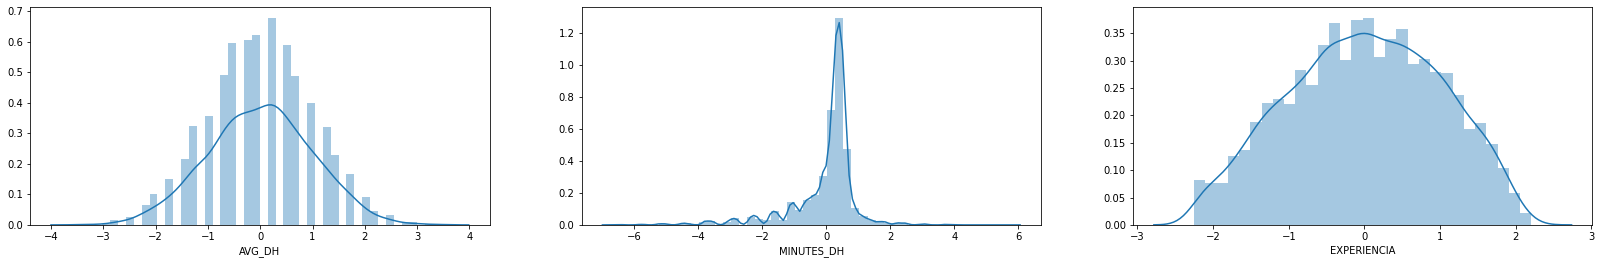

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.distplot(df_training_dataset_1['AVG_DH'].dropna(), ax=axes[0])
sns.distplot(df_training_dataset_1['MINUTES_DH'].dropna(), ax=axes[1])
sns.distplot(df_training_dataset_1['EXPERIENCIA'].dropna(), ax=axes[2])

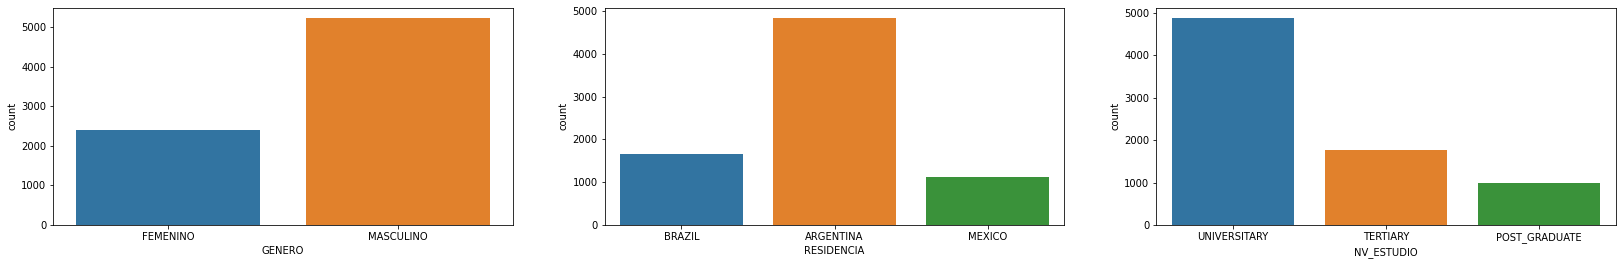

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 4))

sns.countplot(df_training_dataset_1['GENERO'].dropna(), ax=axes[0])
sns.countplot(df_training_dataset_1['RESIDENCIA'].dropna(), ax=axes[1])
sns.countplot(df_training_dataset_1['NV_ESTUDIO'].dropna(), ax=axes[2])

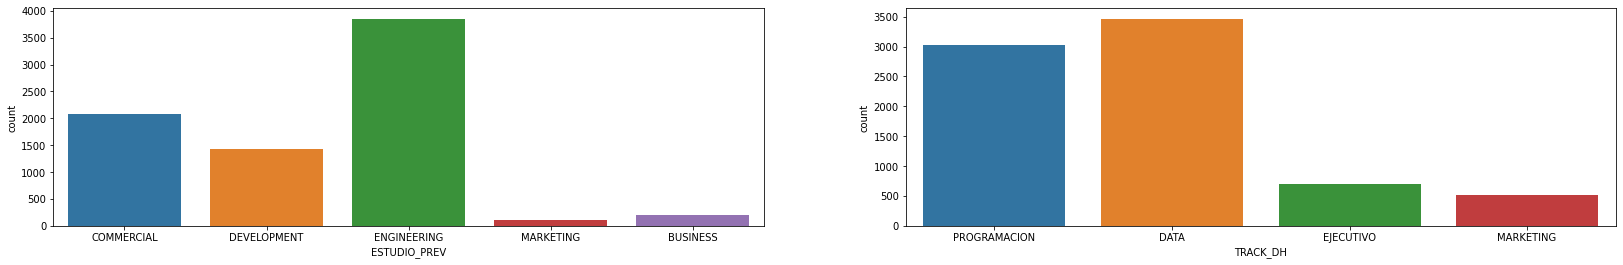

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 4))

sns.countplot(df_training_dataset_1['ESTUDIO_PREV'].dropna(), ax=axes[0])
sns.countplot(df_training_dataset_1['TRACK_DH'].dropna(), ax=axes[1])

### Removendo valores NaN

In [6]:
#df_training_dataset_2 = df_training_dataset_1.dropna()
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder

In [7]:
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = ['GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH']

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df_training_dataset_1[columns])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

In [25]:
df_training_dataset_1.head()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
0,0.599268,0,1,2,NaN,3,-0.997473,-0.549933,0.725083,1.091080
1,1.196381,0,NaN,2,1,3,-0.997473,-0.494832,1.270205,1.972042
2,0.201192,NaN,0,2,2,0,-0.997473,-0.633633,0.263826,-0.318459
3,-0.196883,0,1,2,3,NaN,-0.997473,-0.718286,-0.351184,0.914888
4,-0.993034,NaN,1,2,2,NaN,0.239386,0.511090,NaN,-1.375613


In [8]:
# impute data and convert 
df_training_dataset_2 = pd.DataFrame(np.round(imputer.fit_transform(df_training_dataset_1)),columns = df_training_dataset_1.columns)

Imputing row 1/8995 with 1 missing, elapsed time: 16.988
Imputing row 101/8995 with 0 missing, elapsed time: 16.998
Imputing row 201/8995 with 2 missing, elapsed time: 17.007
Imputing row 301/8995 with 2 missing, elapsed time: 17.018
Imputing row 401/8995 with 0 missing, elapsed time: 17.028
Imputing row 501/8995 with 0 missing, elapsed time: 17.037
Imputing row 601/8995 with 1 missing, elapsed time: 17.046
Imputing row 701/8995 with 2 missing, elapsed time: 17.055
Imputing row 801/8995 with 1 missing, elapsed time: 17.065
Imputing row 901/8995 with 0 missing, elapsed time: 17.076
Imputing row 1001/8995 with 0 missing, elapsed time: 17.086
Imputing row 1101/8995 with 0 missing, elapsed time: 17.095
Imputing row 1201/8995 with 0 missing, elapsed time: 17.104
Imputing row 1301/8995 with 1 missing, elapsed time: 17.114
Imputing row 1401/8995 with 2 missing, elapsed time: 17.124
Imputing row 1501/8995 with 2 missing, elapsed time: 17.133
Imputing row 1601/8995 with 1 missing, elapsed time:

In [27]:
df_training_dataset_2.isnull().sum(axis = 0)

EDAD            0
GENERO          0
RESIDENCIA      0
NV_ESTUDIO      0
ESTUDIO_PREV    0
TRACK_DH        0
AVG_DH          0
MINUTES_DH      0
EXPERIENCIA     0
DIAS_EMP        0
dtype: int64

### Codificando variables categóricas

In [ ]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies`` (demontración)
#df_training_dataset_3 = pd.get_dummies(df_training_dataset_2, columns=['GENERO'])
#df_training_dataset_3.tail()

### Seleccionando las columnas "features" y "target"

In [28]:
df_training_dataset_2.columns

Index(['EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV',
       'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA', 'DIAS_EMP'],
      dtype='object')

In [9]:
features = df_training_dataset_2[
    [
        'EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV',
       'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA'
    ]
]

target = df_training_dataset_2['DIAS_EMP']  ## NO CAMBIE EL NOMBRE DE LA VARIABLE "target".

### Dividiendo el conjunto de datos para una "prueba ciega"

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

### Entrenando un modelo de regresión lineal simple

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
regression_model = GradientBoostingRegressor(**params).fit(X_train, y_train)
#regression_model = LinearRegression().fit(X_train, y_train)

In [32]:
mse = mean_squared_error(y_test, regression_model.predict(X_test))

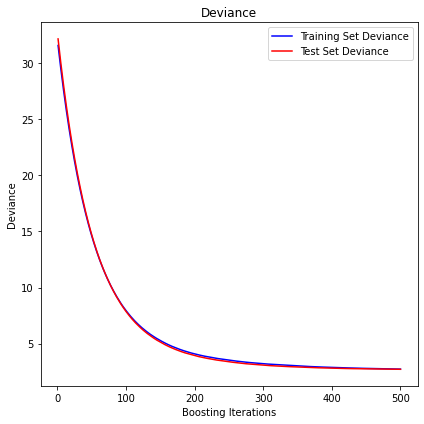

In [12]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(regression_model.staged_predict(X_test)):
    test_score[i] = regression_model.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, regression_model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

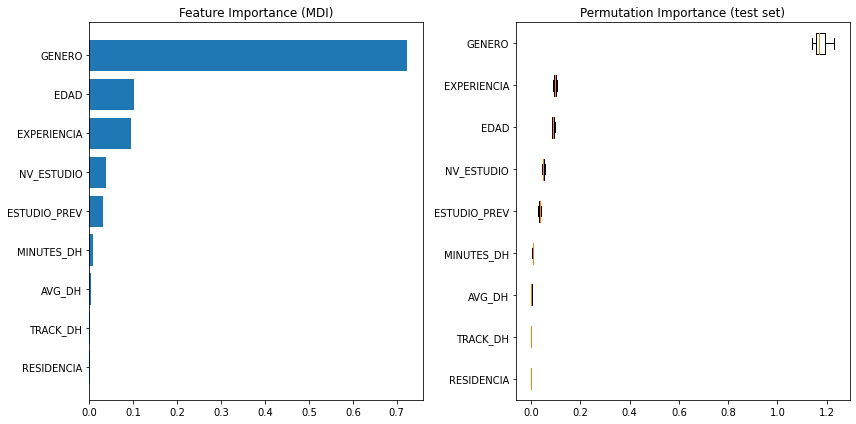

In [34]:
from sklearn.inspection import permutation_importance
feature_importance = regression_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(regression_model, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(features.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### Evaluando el modelo de regresión con el método  "score()" de sklearn

In [13]:
regression_model.score(X_test, y_test)

0.916743262652829

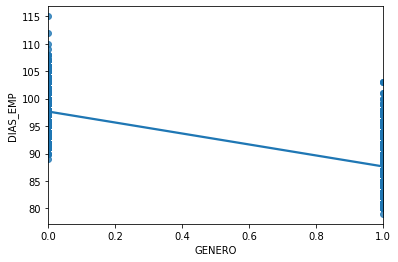

In [14]:
ax = sns.regplot(x="GENERO", y="DIAS_EMP", data=df_training_dataset_2)

Text(0, 0.5, 'Predictions ')

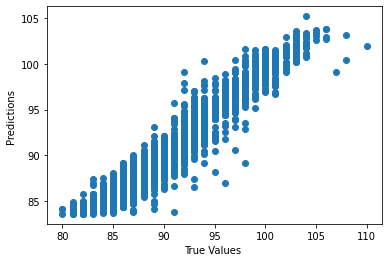

In [15]:
g=plt.scatter(y_test, y_pred)
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')

<hr>

## Completar los datos necesarios para entregar la solución

### Como entrega de su solución, esperamos los resultados numéricos predichos por su modelo. Como entrada utilizará el archivo "to_be_scored.csv"

In [ ]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_digitalhouse.csv')
df_to_be_scored.tail()

--2020-09-17 06:34:21--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67308 (66K) [text/plain]
Saving to: ‘to_be_scored_digitalhouse.csv.1’

to_be_scored_digita 100%[===================>]  65.73K  --.-KB/s    in 0.03s   

2020-09-17 06:34:22 (2.31 MB/s) - ‘to_be_scored_digitalhouse.csv.1’ saved [67308/67308]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,Unnamed: 10
995,995,33.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.6,4576.5,15.1,NaN
996,996,40.0,MASCULINO,ARGENTINA,TERTIARY,COMMERCIAL,PROGRAMACION,3.4,4542.9,26.1,NaN
997,997,NaN,FEMENINO,ARGENTINA,UNIVERSITARY,ENGINEERING,DATA,3.4,NaN,27.4,NaN
998,998,NaN,MASCULINO,MEXICO,UNIVERSITARY,ENGINEERING,DATA,3.7,4730.4,1.1,NaN
999,999,36.0,NaN,ARGENTINA,UNIVERSITARY,NaN,PROGRAMACION,3.3,4506.5,20.4,NaN


# ¡Atención!

### El marco de datos ``to_be_scored`` es su "hoja de evaluación". Tenga en cuenta que la columna "target" no existe en esta muestra, por lo que no se puede utilizar para modelos de entrenamiento basados en el aprendizaje supervisado.

# ¡Atención!

### Debes realizar los mismos pasos de procesamiento previo que hiciste en el conjunto de datos de entrenamiento antes de calificar la "hoja de respuestas"

In [ ]:
df_to_be_scored_1 = df_to_be_scored.drop(columns=['Unnamed: 0','Unnamed: 10'], inplace=False)

In [ ]:
for columns in cat_cols:
    encode(df_to_be_scored_1[columns])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setit

In [ ]:
df_to_be_scored_2 = pd.DataFrame(np.round(imputer.fit_transform(df_to_be_scored_1)),columns = df_to_be_scored_1.columns)

Imputing row 1/1000 with 1 missing, elapsed time: 0.205
Imputing row 101/1000 with 2 missing, elapsed time: 0.209
Imputing row 201/1000 with 2 missing, elapsed time: 0.212
Imputing row 301/1000 with 1 missing, elapsed time: 0.216
Imputing row 401/1000 with 1 missing, elapsed time: 0.219
Imputing row 501/1000 with 3 missing, elapsed time: 0.222
Imputing row 601/1000 with 3 missing, elapsed time: 0.226
Imputing row 701/1000 with 2 missing, elapsed time: 0.229
Imputing row 801/1000 with 0 missing, elapsed time: 0.232
Imputing row 901/1000 with 1 missing, elapsed time: 0.236


In [ ]:
df_to_be_scored_2.columns

Index(['EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV',
       'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA'],
      dtype='object')

In [ ]:
df_to_be_scored_2.head()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA
0,43.0,1.0,0.0,0.0,3.0,3.0,4.0,4558.0,19.0
1,42.0,0.0,1.0,2.0,1.0,0.0,4.0,4656.0,26.0
2,35.0,0.0,0.0,2.0,2.0,2.0,4.0,4695.0,19.0
3,35.0,1.0,2.0,1.0,2.0,2.0,4.0,4778.0,18.0
4,36.0,1.0,1.0,0.0,1.0,3.0,4.0,4722.0,19.0


<hr>

### Hacer las predicciones con el método "predict()" de sklearn y agregar los resultados en el marco de datos de la "hoja de evaluación"

In [ ]:
y_pred = regression_model.predict(df_to_be_scored_2)
df_to_be_scored_2['target'] = y_pred
df_to_be_scored_2.tail()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,target
995,33.0,1.0,0.0,2.0,1.0,3.0,4.0,4576.0,15.0,86.115149
996,40.0,1.0,0.0,1.0,1.0,3.0,3.0,4543.0,26.0,92.751767
997,38.0,0.0,0.0,2.0,3.0,0.0,3.0,2067.0,27.0,99.790779
998,33.0,1.0,2.0,2.0,3.0,0.0,4.0,4730.0,1.0,84.437041
999,36.0,1.0,0.0,2.0,0.0,3.0,3.0,4506.0,20.0,90.556539


# ¡Atención!

### La columna agregada con los resultados debe llamarse "target", de lo contrario, su envío fallará.

<hr>

### Exportar el marco de datos de resultados como un archivo .csv a su proyecto de Watson Studio.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_to_be_scored_2.to_csv('drive/My Drive/results.csv')

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_2.to_csv(index=False))